PLEASE COMMENT AFTER PANDAS AND LET ME KNOW HOW TO MOVE FORWARD NOW. I AM ON THE WAY TO GET BETTER VISUALIZATION BUT NEED SUGGETIONS AS WELL. THANKS

In [1]:
#Reading MIMIC data
df = spark.read.csv("mimic.csv", header='true', inferSchema='true')
df.show()
df.printSchema()

+---------+---+-------+-----+-----+------+-----+------+-------------------+-------------------+----------+---------+-------------------+-------------------+----------+
|person_id|age|paramCT|gpiCT|ndcCT|ahfsCT|medCT|gender|         birth_date|         F_T2D_Diag|F_T1D_Diag|F_LD_Diag|          F_KD_Diag|         F_CVD_Diag|F_ALZ_Diag|
+---------+---+-------+-----+-----+------+-----+------+-------------------+-------------------+----------+---------+-------------------+-------------------+----------+
|        2|  0|     47|    2|    2|     2|    2|     M|2138-07-17 00:00:00|               null|      null|     null|               null|               null|      null|
|        3| 76|   1509| null| null|  null| null|     M|2025-04-11 00:00:00|               null|      null|     null|               null|2101-10-20 19:08:00|      null|
|        4| 47|   1606|   52|   52|    52|   52|     F|2143-05-12 00:00:00|               null|      null|     null|               null|               null|    

In [2]:
#count row and column to explore
def shape(self):
    return (self.count(), len(self.columns))
shape(df)

(52643, 15)

In [4]:
#Certain selected columns as required
df1=df.select('age','gender','birth_date','F_T2D_Diag','F_T1D_Diag','F_LD_Diag','F_KD_Diag','F_CVD_Diag','F_ALZ_Diag')

In [5]:
df1.show()

+---+------+-------------------+-------------------+----------+---------+-------------------+-------------------+----------+
|age|gender|         birth_date|         F_T2D_Diag|F_T1D_Diag|F_LD_Diag|          F_KD_Diag|         F_CVD_Diag|F_ALZ_Diag|
+---+------+-------------------+-------------------+----------+---------+-------------------+-------------------+----------+
|  0|     M|2138-07-17 00:00:00|               null|      null|     null|               null|               null|      null|
| 76|     M|2025-04-11 00:00:00|               null|      null|     null|               null|2101-10-20 19:08:00|      null|
| 47|     F|2143-05-12 00:00:00|               null|      null|     null|               null|               null|      null|
|  0|     M|2103-02-02 00:00:00|               null|      null|     null|               null|               null|      null|
| 65|     F|2109-06-21 00:00:00|               null|      null|     null|2175-05-30 07:15:00|2175-05-30 07:15:00|      null|


In [8]:
df1.count()

52643

In [9]:
df1.groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|23184|
|     M|29459|
+------+-----+



COUNTING FOR TYPE 2 DIABETES

In [10]:
df1.filter(df1.F_T2D_Diag. isNotNull()).count()

12184

In [11]:
df1.filter(df1.F_T2D_Diag. isNotNull()).groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F| 5228|
|     M| 6956|
+------+-----+



COUNTING FOR TYPE 1 DIABETES

In [12]:
df1.filter(df1.F_T1D_Diag. isNotNull()).count()

441

In [13]:
df1.filter(df1.F_T1D_Diag. isNotNull()).groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  190|
|     M|  251|
+------+-----+



COUNTING FOR ALZHEIMER'S DISEASE



In [14]:
df1.filter(df1.F_ALZ_Diag. isNotNull()).count()

600

In [15]:
df1.filter(df1.F_ALZ_Diag. isNotNull()).groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  348|
|     M|  252|
+------+-----+



In [31]:
#Age of Type 2 Diabetes (T2D)diagnosed:
from pyspark.sql.functions import rank, col, unix_timestamp, from_unixtime, to_timestamp
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd"
age_of_T2D_diag =F.round((F.col("F_T2D_Diag").cast("long") - F.col("birth_date").cast("long"))/(365*60*60*24), 3)
df1=df1.withColumn("Age_T2D_Diag", age_of_T2D_diag)
df1.head()


Row(age=0, gender='M', birth_date=datetime.datetime(2138, 7, 17, 0, 0), F_T2D_Diag=None, F_T1D_Diag=None, F_LD_Diag=None, F_KD_Diag=None, F_CVD_Diag=None, F_ALZ_Diag=None, Age_T2D_Diag=None)

In [32]:
#Age of TYpe one diabetes F_T1D_Diag diagnosed:
age_of_T1D_diag=F.round((F.col("F_T1D_Diag").cast("long") - F.col("birth_date").cast("long"))/(365*60*60*24), 3)
df1 = df1.withColumn("Age_T1D_Diag", age_of_T1D_diag)
df1.head()

Row(age=0, gender='M', birth_date=datetime.datetime(2138, 7, 17, 0, 0), F_T2D_Diag=None, F_T1D_Diag=None, F_LD_Diag=None, F_KD_Diag=None, F_CVD_Diag=None, F_ALZ_Diag=None, Age_T2D_Diag=None, Age_T1D_Diag=None)

In [33]:
#Age of F_LD_Diag diagnosed:
age_of_LD_diag=F.round((F.col("F_LD_Diag").cast("long") - F.col("birth_date").cast("long"))/(365*60*60*24), 3)
df1 = df1.withColumn("Age_F_LD_Diag", age_of_LD_diag)
df1.head()

Row(age=0, gender='M', birth_date=datetime.datetime(2138, 7, 17, 0, 0), F_T2D_Diag=None, F_T1D_Diag=None, F_LD_Diag=None, F_KD_Diag=None, F_CVD_Diag=None, F_ALZ_Diag=None, Age_T2D_Diag=None, Age_T1D_Diag=None, Age_F_LD_Diag=None)

In [34]:
#Age of F_KD_Diag diagnosed:
age_of_KD_diag = F.round((F.col("F_KD_Diag").cast("long") - F.col("birth_date").cast("long"))/(365*60*60*24), 3)
df1 = df1.withColumn("Age_F_KD_Diag", age_of_KD_diag)
df1.head()

Row(age=0, gender='M', birth_date=datetime.datetime(2138, 7, 17, 0, 0), F_T2D_Diag=None, F_T1D_Diag=None, F_LD_Diag=None, F_KD_Diag=None, F_CVD_Diag=None, F_ALZ_Diag=None, Age_T2D_Diag=None, Age_T1D_Diag=None, Age_F_LD_Diag=None, Age_F_KD_Diag=None)

In [35]:
#Age of F_CVD_Diag diagnosed:
age_of_CVD_diag = F.round((F.col("F_CVD_Diag").cast("long") - F.col("birth_date").cast("long"))/(365*60*60*24), 3)
df1 = df1.withColumn("Age_F_CVD_Diag", age_of_CVD_diag)
df1.head()

Row(age=0, gender='M', birth_date=datetime.datetime(2138, 7, 17, 0, 0), F_T2D_Diag=None, F_T1D_Diag=None, F_LD_Diag=None, F_KD_Diag=None, F_CVD_Diag=None, F_ALZ_Diag=None, Age_T2D_Diag=None, Age_T1D_Diag=None, Age_F_LD_Diag=None, Age_F_KD_Diag=None, Age_F_CVD_Diag=None)

In [36]:
#Age of F_ALZ_Diag diagnosed:
age_of_AD_diag = F.round((F.col("F_ALZ_Diag").cast("long") - F.col("birth_date").cast("long"))/(365*60*60*24), 3)
df1 = df1.withColumn("Age_F_AD_Diag", age_of_AD_diag)
df1.head()


Row(age=0, gender='M', birth_date=datetime.datetime(2138, 7, 17, 0, 0), F_T2D_Diag=None, F_T1D_Diag=None, F_LD_Diag=None, F_KD_Diag=None, F_CVD_Diag=None, F_ALZ_Diag=None, Age_T2D_Diag=None, Age_T1D_Diag=None, Age_F_LD_Diag=None, Age_F_KD_Diag=None, Age_F_CVD_Diag=None, Age_F_AD_Diag=None)

In [37]:
df1.show(1)

+---+------+-------------------+----------+----------+---------+---------+----------+----------+------------+------------+-------------+-------------+--------------+-------------+
|age|gender|         birth_date|F_T2D_Diag|F_T1D_Diag|F_LD_Diag|F_KD_Diag|F_CVD_Diag|F_ALZ_Diag|Age_T2D_Diag|Age_T1D_Diag|Age_F_LD_Diag|Age_F_KD_Diag|Age_F_CVD_Diag|Age_F_AD_Diag|
+---+------+-------------------+----------+----------+---------+---------+----------+----------+------------+------------+-------------+-------------+--------------+-------------+
|  0|     M|2138-07-17 00:00:00|      null|      null|     null|     null|      null|      null|        null|        null|         null|         null|          null|         null|
+---+------+-------------------+----------+----------+---------+---------+----------+----------+------------+------------+-------------+-------------+--------------+-------------+
only showing top 1 row



In [39]:
df1.select('age','gender','Age_T2D_Diag','Age_T1D_Diag','Age_F_AD_Diag','Age_F_CVD_Diag','Age_F_KD_Diag','Age_F_LD_Diag')

DataFrame[age: int, gender: string, Age_T2D_Diag: double, Age_T1D_Diag: double, Age_F_AD_Diag: double, Age_F_CVD_Diag: double, Age_F_KD_Diag: double, Age_F_LD_Diag: double]

In [13]:
#new Data Frame with selected columns
df2=df1.select('age','gender','Age_T2D_Diag','Age_T1D_Diag','Age_F_AD_Diag','Age_F_CVD_Diag','Age_F_KD_Diag','Age_F_LD_Diag')

In [40]:
df2.show()

+---+------+------------+------------+-------------+--------------+-------------+-------------+
|age|gender|Age_T2D_Diag|Age_T1D_Diag|Age_F_AD_Diag|Age_F_CVD_Diag|Age_F_KD_Diag|Age_F_LD_Diag|
+---+------+------------+------------+-------------+--------------+-------------+-------------+
|  0|     M|        null|        null|         null|          null|         null|         null|
| 76|     M|        null|        null|         null|        76.578|         null|         null|
| 47|     F|        null|        null|         null|          null|         null|         null|
|  0|     M|        null|        null|         null|          null|         null|         null|
| 65|     F|        null|        null|         null|        65.984|       65.984|         null|
|  0|     F|        null|        null|         null|          null|         null|         null|
|  0|     M|        null|        null|         null|          null|         null|         null|
| 41|     M|        null|        null|  

In [43]:
#selected columns
new_data=df2[['gender','Age_T2D_Diag','Age_T1D_Diag','Age_F_AD_Diag']]
#new_data_df=new_data.na.drop()
#new_data_df.show()
new_data.show()

+------+------------+------------+-------------+
|gender|Age_T2D_Diag|Age_T1D_Diag|Age_F_AD_Diag|
+------+------------+------------+-------------+
|     M|        null|        null|         null|
|     M|        null|        null|         null|
|     F|        null|        null|         null|
|     M|        null|        null|         null|
|     F|        null|        null|         null|
|     F|        null|        null|         null|
|     M|        null|        null|         null|
|     M|        null|        null|         null|
|     F|        null|        null|         null|
|     F|        null|        null|         null|
|     M|        null|        null|         null|
|     F|      39.893|        null|         null|
|     M|        null|        null|         null|
|     F|        null|        null|         null|
|     M|      50.875|        null|         null|
|     M|        null|        null|         null|
|     F|      75.927|        null|         null|
|     M|      87.497

In [44]:
new_pd=new_data.toPandas()

In [45]:
new_pd

,gender,Age_T2D_Diag,Age_T1D_Diag,Age_F_AD_Diag
0,M,NaN,NaN,NaN
1,M,NaN,NaN,NaN
2,F,NaN,NaN,NaN
3,M,NaN,NaN,NaN
4,F,NaN,NaN,NaN
...,...,...,...,...
52638,M,NaN,NaN,NaN
52639,M,47.749,NaN,NaN
52640,F,NaN,NaN,NaN
52641,F,88.757,NaN,NaN


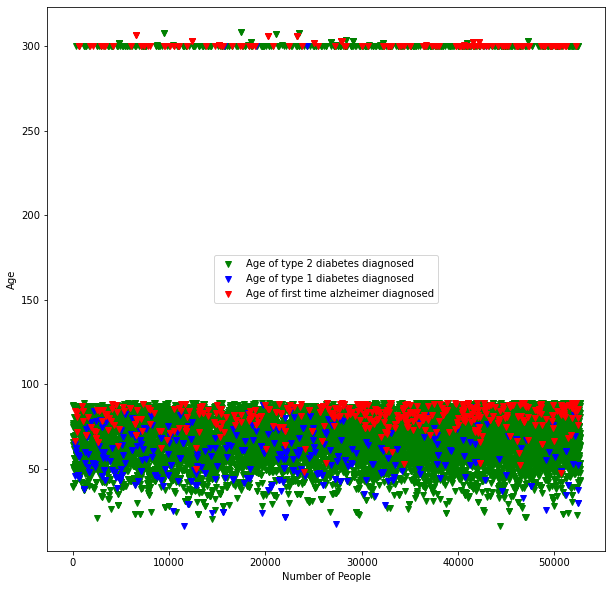

In [62]:
import numpy as np       
from matplotlib import pylab
import matplotlib.pyplot as plt   
fig, ax=plt.subplots(figsize=(10,10))
ax.plot(new_pd.index,new_pd['Age_T2D_Diag'],marker='v',linestyle='None',color='g',label='Age of type 2 diabetes diagnosed')
ax.plot(new_pd.index,new_pd['Age_T1D_Diag'],marker='v',linestyle='None',color='b',label='Age of type 1 diabetes diagnosed')
ax.plot(new_pd.index,new_pd['Age_F_AD_Diag'],marker='v',linestyle='None',color='r',label='Age of first time alzheimer diagnosed')

plt.legend(loc="center")
ax.set_xlabel("Number of People")
ax.set_ylabel("Age")

plt.show()

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

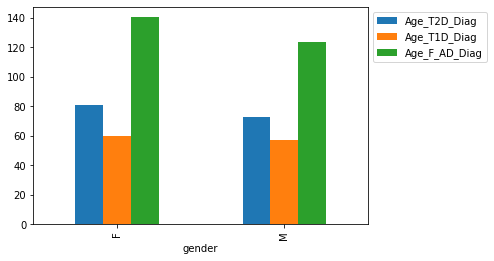

In [48]:
new_pd.groupby('gender').mean().plot(kind='bar').legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

In [61]:
new_pd.shape
new_pd.dtypes

gender            object
Age_T2D_Diag     float64
Age_T1D_Diag     float64
Age_F_AD_Diag    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F183183A30>]],
      dtype=object)

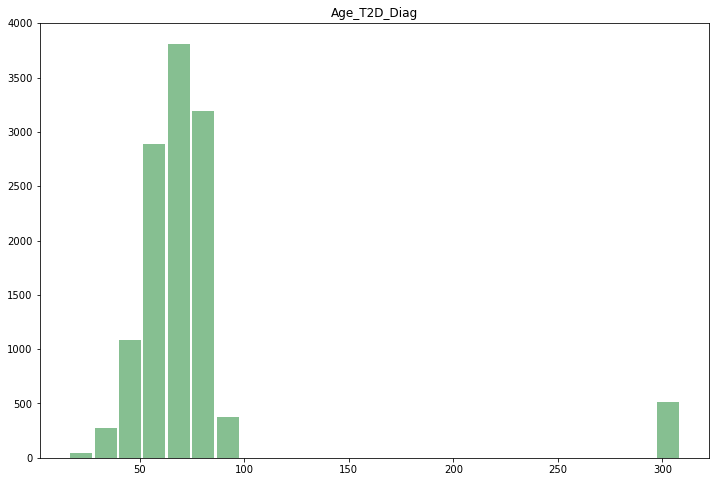

In [49]:
new_pd.hist(column='Age_T2D_Diag', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F185694C40>]],
      dtype=object)

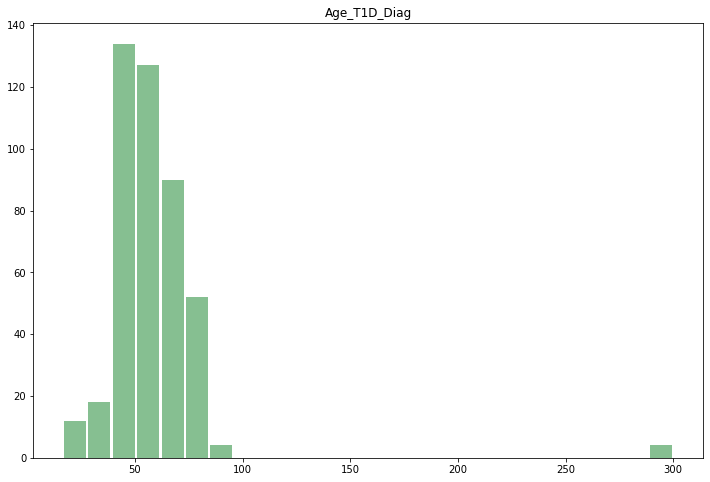

In [50]:
new_pd.hist(column='Age_T1D_Diag', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [51]:
print(new_pd.head(3))

  gender  Age_T2D_Diag  Age_T1D_Diag  Age_F_AD_Diag
0      M           NaN           NaN            NaN
1      M           NaN           NaN            NaN
2      F           NaN           NaN            NaN


In [52]:
# Age of Type 2 diabestes vs gender by removing null values
T2D_df=df2[['gender', 'Age_T2D_Diag']] 
T2D_df_new=T2D_df.na.drop()
T2D_df_new.show()


+------+------------+
|gender|Age_T2D_Diag|
+------+------------+
|     F|      39.893|
|     M|      50.875|
|     F|      75.927|
|     M|      87.497|
|     M|      39.043|
|     M|      74.434|
|     F|      69.489|
|     M|      68.975|
|     F|      64.205|
|     F|      87.153|
|     F|      76.823|
|     F|      65.585|
|     F|      49.309|
|     M|        56.2|
|     M|      61.446|
|     M|      50.974|
|     M|      50.974|
|     M|      74.752|
|     M|      80.505|
|     F|      68.075|
+------+------------+
only showing top 20 rows



In [53]:
#total number diagonosed type 2 diabetes
T2D_df_new.count()

12184

In [54]:
#counting by male and female
T2D_df_new.groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F| 5228|
|     M| 6956|
+------+-----+



In [55]:
#Age of Type 1 diabestes vs gender by removing null values
T1D_df=df2[['gender', 'Age_T1D_Diag']]
T1D_df_new=T1D_df.na.drop()
T1D_df_new.show()


+------+------------+
|gender|Age_T1D_Diag|
+------+------------+
|     M|       64.48|
|     F|      45.717|
|     M|      59.999|
|     M|      62.233|
|     M|      62.233|
|     M|      62.233|
|     M|      62.233|
|     F|      58.205|
|     F|      58.205|
|     M|       46.55|
|     M|       46.55|
|     M|       46.55|
|     M|       46.55|
|     M|      56.764|
|     M|      44.284|
|     M|      38.292|
|     M|      38.292|
|     F|      59.631|
|     M|      53.672|
|     F|      73.338|
+------+------------+
only showing top 20 rows



In [56]:
#total number diagonosed type 1 diabetes
T1D_df_new.count()

441

In [57]:
#counting by male and female
T1D_df_new.groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  190|
|     M|  251|
+------+-----+



In [58]:
#Age_F_AD_Diag vs gender by removing null values 
FAD_df=df2[['gender', 'Age_F_AD_Diag']] 
FAD_df_new=FAD_df.na.drop()
FAD_df_new.show()

+------+-------------+
|gender|Age_F_AD_Diag|
+------+-------------+
|     F|       66.714|
|     F|       84.211|
|     M|       71.498|
|     F|       83.728|
|     F|       80.553|
|     M|      300.202|
|     F|      300.201|
|     F|      300.201|
|     F|       87.353|
|     M|       84.443|
|     F|       78.246|
|     M|       69.988|
|     M|       69.988|
|     M|       80.429|
|     F|        300.2|
|     F|       74.652|
|     F|      300.203|
|     F|       72.199|
|     M|       68.299|
|     M|       68.299|
+------+-------------+
only showing top 20 rows



In [59]:
#total number Age_F_AD_Diag
FAD_df_new.count()

600

In [60]:
#counting by male and female
FAD_df_new.groupby(["gender"]).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  348|
|     M|  252|
+------+-----+

